In [20]:
try:
    import os
    import glob
    import numpy as np
    import pandas as pd

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline

except Exception as e:
    print(f"Error : {e}")

In [21]:
# Find the CSV file in the Datasets directory
data_path = '../Datasets/*.csv'
file_list = glob.glob(data_path)

for file in file_list:
    print(f"Found file: {file}")

# Ensure there is exactly one file
if len(file_list) == 1:
    # Load the dataset
    df = pd.read_csv(file_list[0])
    print(f"Loaded dataset: {file_list[0]}")
else:
    raise FileNotFoundError("No CSV file found or multiple CSV files found in the Datasets directory.")

Found file: ../Datasets/Dataset.csv
Loaded dataset: ../Datasets/Dataset.csv


In [22]:
# File path to save the trained model
destination = '../Models/'
os.makedirs(destination, exist_ok=True)
print(f"Model will be saved to: {destination}")

Model will be saved to: ../Models/


In [23]:
# Features (X) and target (y)
X = df.drop(columns=['Lifespan'])  # Features excluding the target variable
y = df['Lifespan']  # Target variable

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing for numerical features: Standard Scaling
numerical_transformer = StandardScaler()

# Preprocessing for categorical features: One-Hot Encoding
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Create a ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_processed = pipeline.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Checking the shapes of the processed data
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Training features shape: (800, 19)
Testing features shape: (200, 19)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1814200.8750 - mae: 1302.2971 - val_loss: 1852780.3750 - val_mae: 1320.0710
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 1823857.8750 - mae: 1305.3876 - val_loss: 1847886.7500 - val_mae: 1318.1725
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 1777887.2500 - mae: 1289.7183 - val_loss: 1839104.6250 - val_mae: 1314.7776
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 1772426.3750 - mae: 1285.2733 - val_loss: 1823795.2500 - val_mae: 1308.8718
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 1794246.3750 - mae: 1293.3633 - val_loss: 1798684.0000 - val_mae: 1299.1725
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 1769273.8750 - mae: 1281.4574 - val_loss: 1760334.7500 - val_mae: 1284.2705
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 1714897.3750 - mae: 1258.4670 - val_loss: 1704971.2500 - val_mae: 1262.5103
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/ste

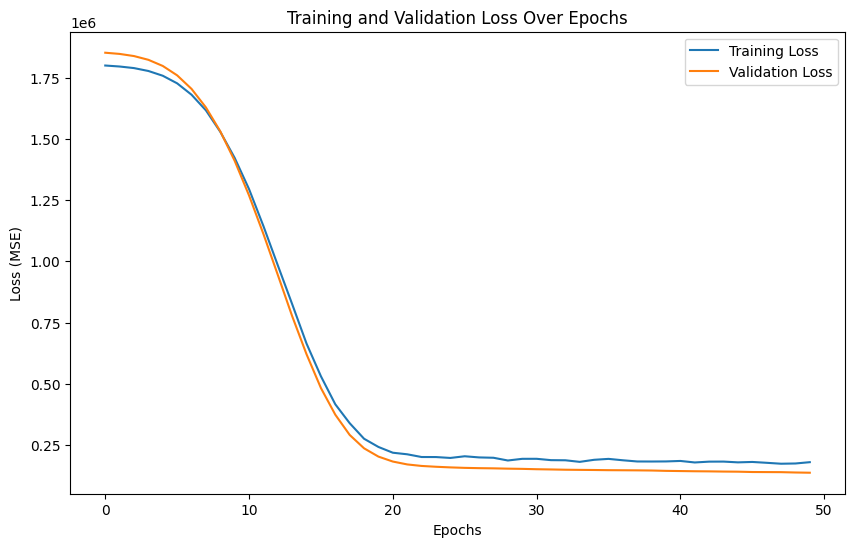

In [24]:
# Import necessary libraries for Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
import numpy as np

# Define the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Optional dropout to avoid overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Using a linear activation for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"Neural Network RMSE: {rmse:.2f}")
print(f"Neural Network R² Score: {r2:.2f}")
print(f"Neural Network MAE: {mae:.2f}")
print(f"Neural Network MSLE: {msle:.2f}")

# Optional: Plot the loss during training
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()